# Decision Tree

Name: SAI AKHIL SN | Batch Date: 27 Jan 2021

#### Business problem:
To know about the segment or attributes that causes high sale. 

A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv('C://Users/oftog/Downloads/Company_Data.csv')

In [28]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [30]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [31]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [32]:
df=data.copy()

In [33]:
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


### Converting target variable to categorical data

In [34]:
df.insert(11,'Sales_class'," ")

for i in range(0,len(df['Sales']),1):
    if df['Sales'].iloc[i]<=7.5:
        df['Sales_class'].iloc[i]='Low'
    else:
        df['Sales_class'].iloc[i]='high'

C:\Users\Public\anacon\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [36]:
df.drop(['Sales'],axis=1,inplace=True)

In [37]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


### Label encoding

In [38]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df['Sales_class']= label_encoder.fit_transform(df['Sales_class'])

In [42]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


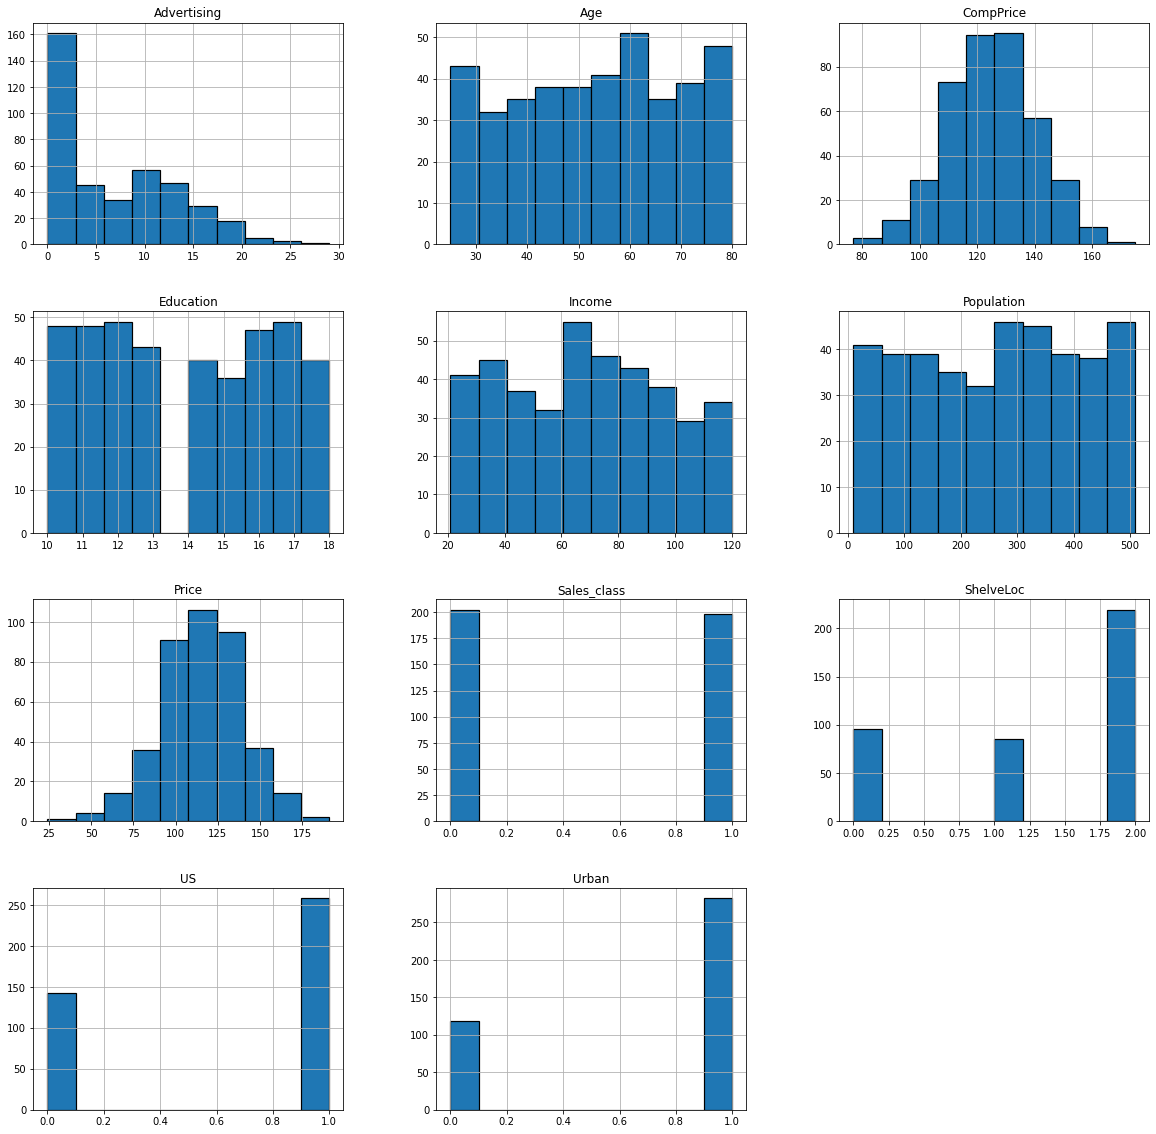

In [41]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

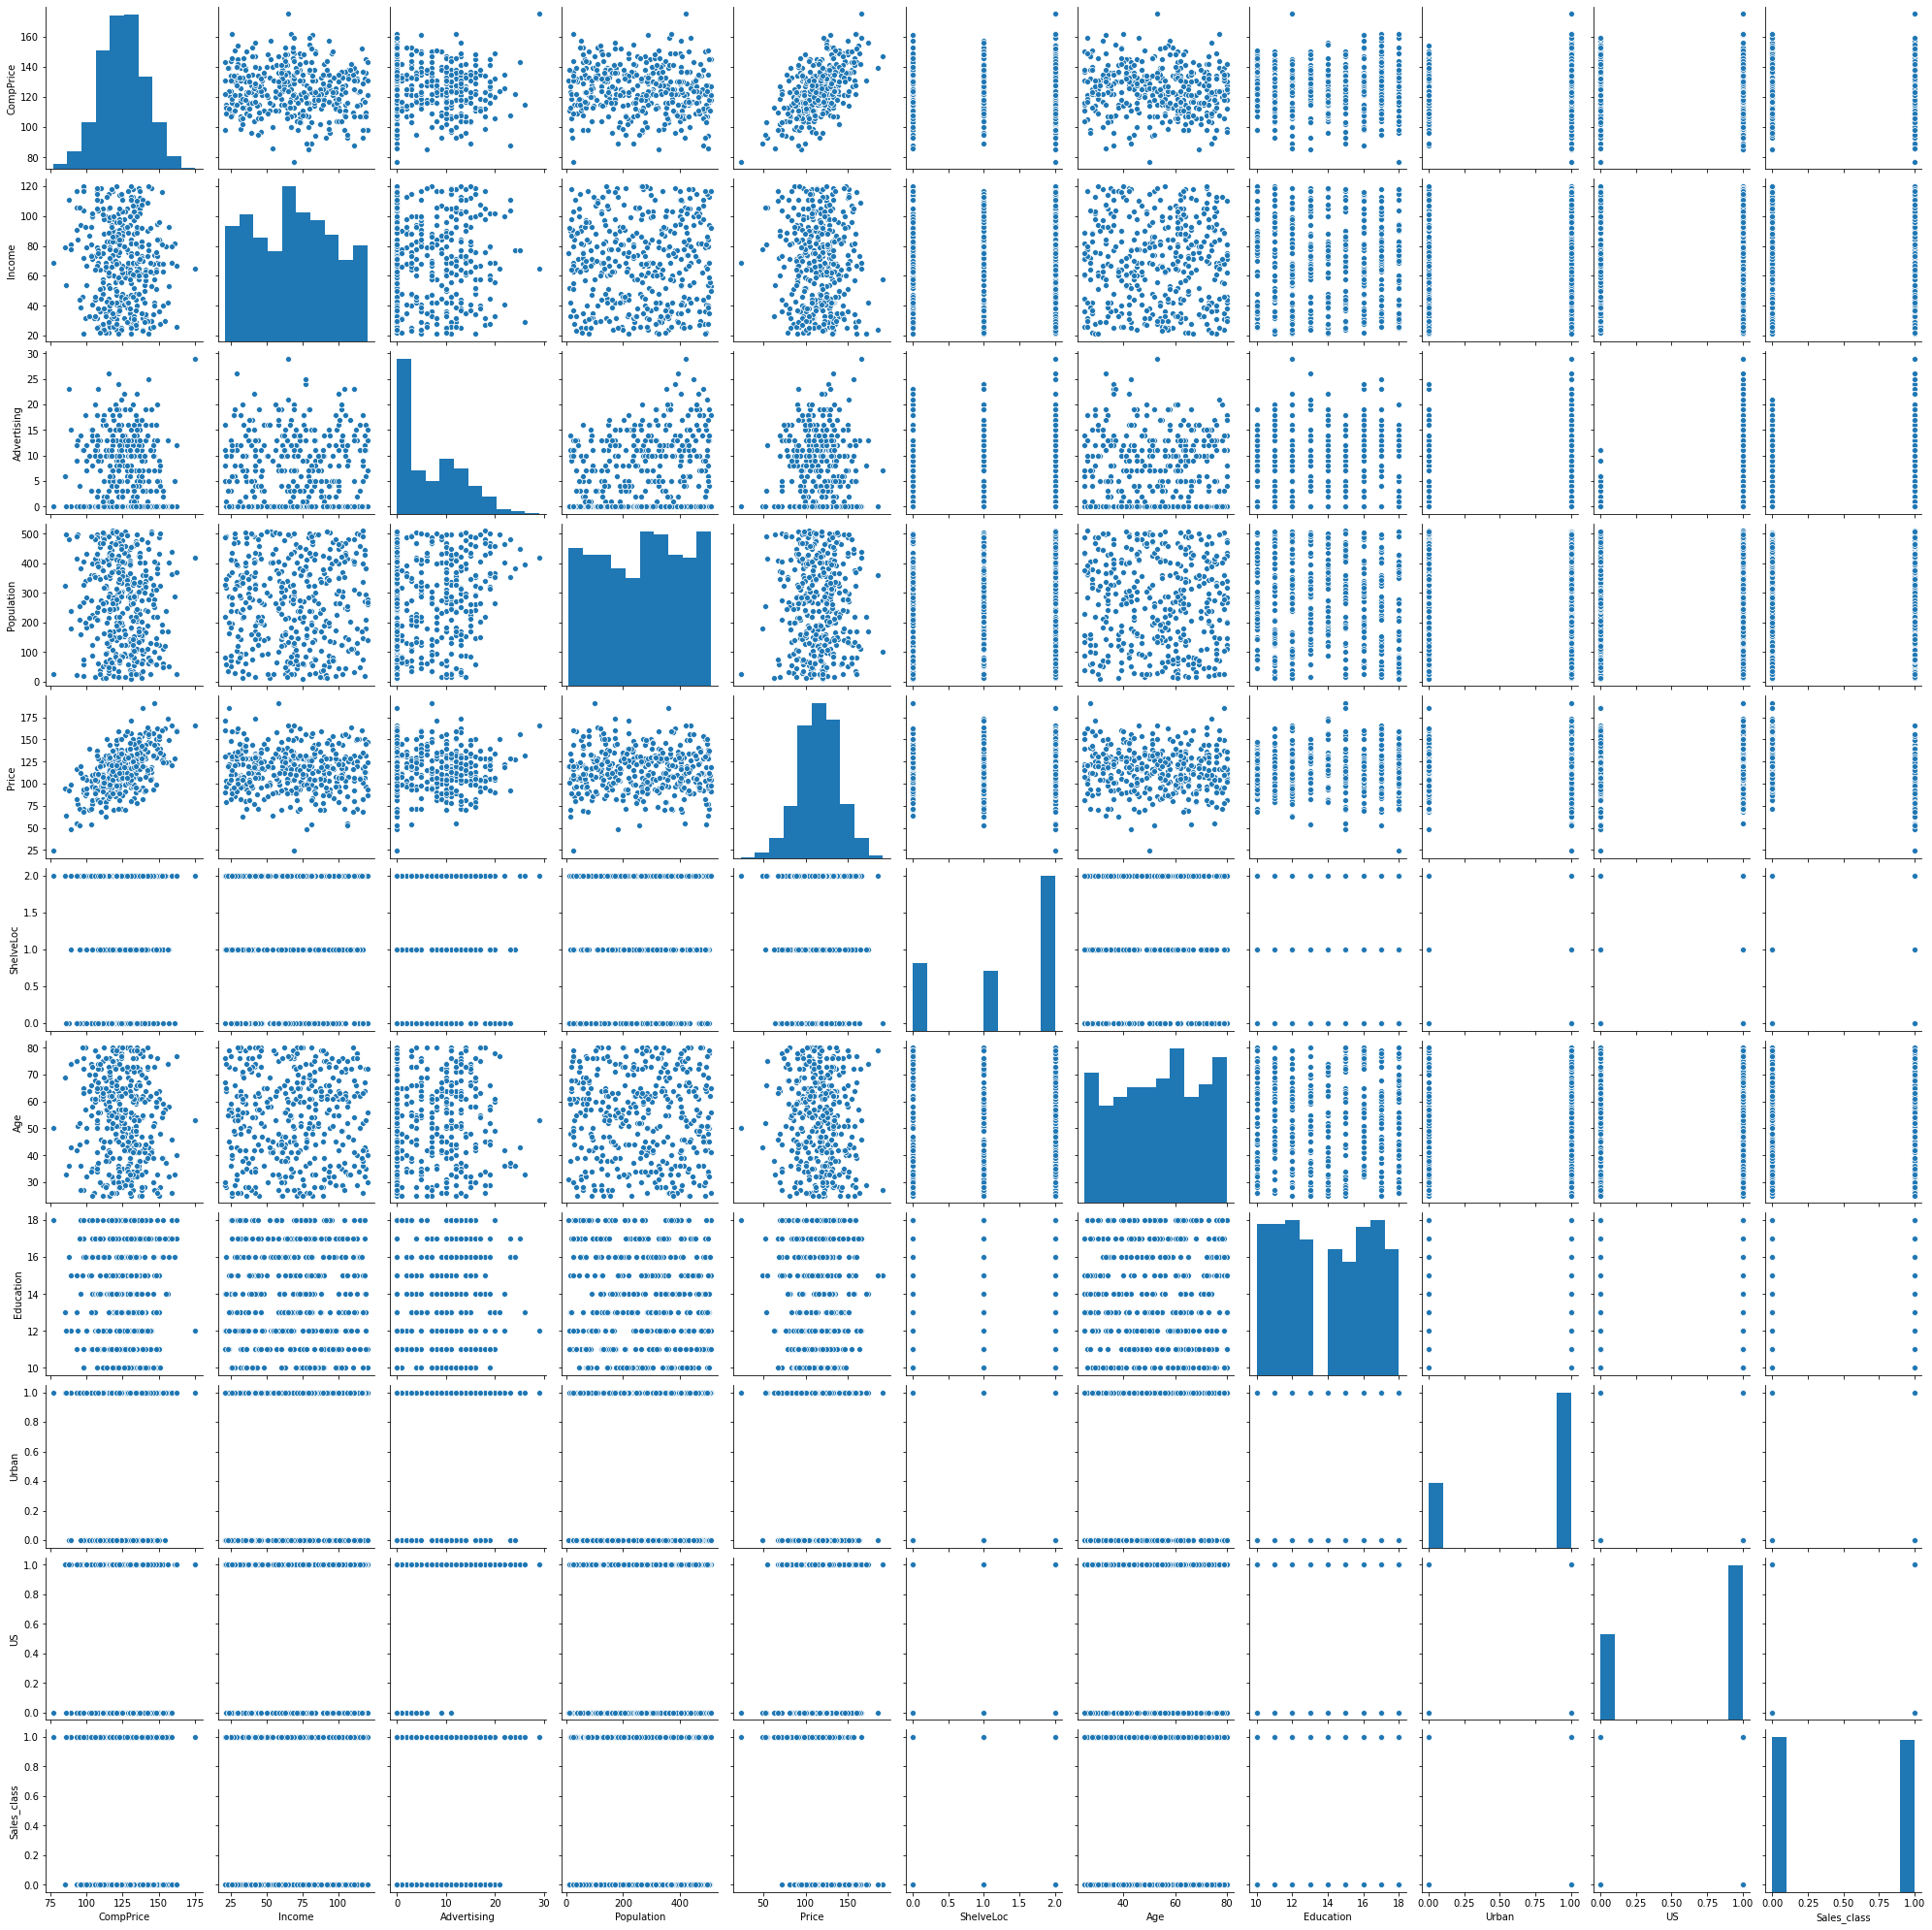

In [184]:
sns.pairplot(df)

Shape of your Data Set: (400, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 36


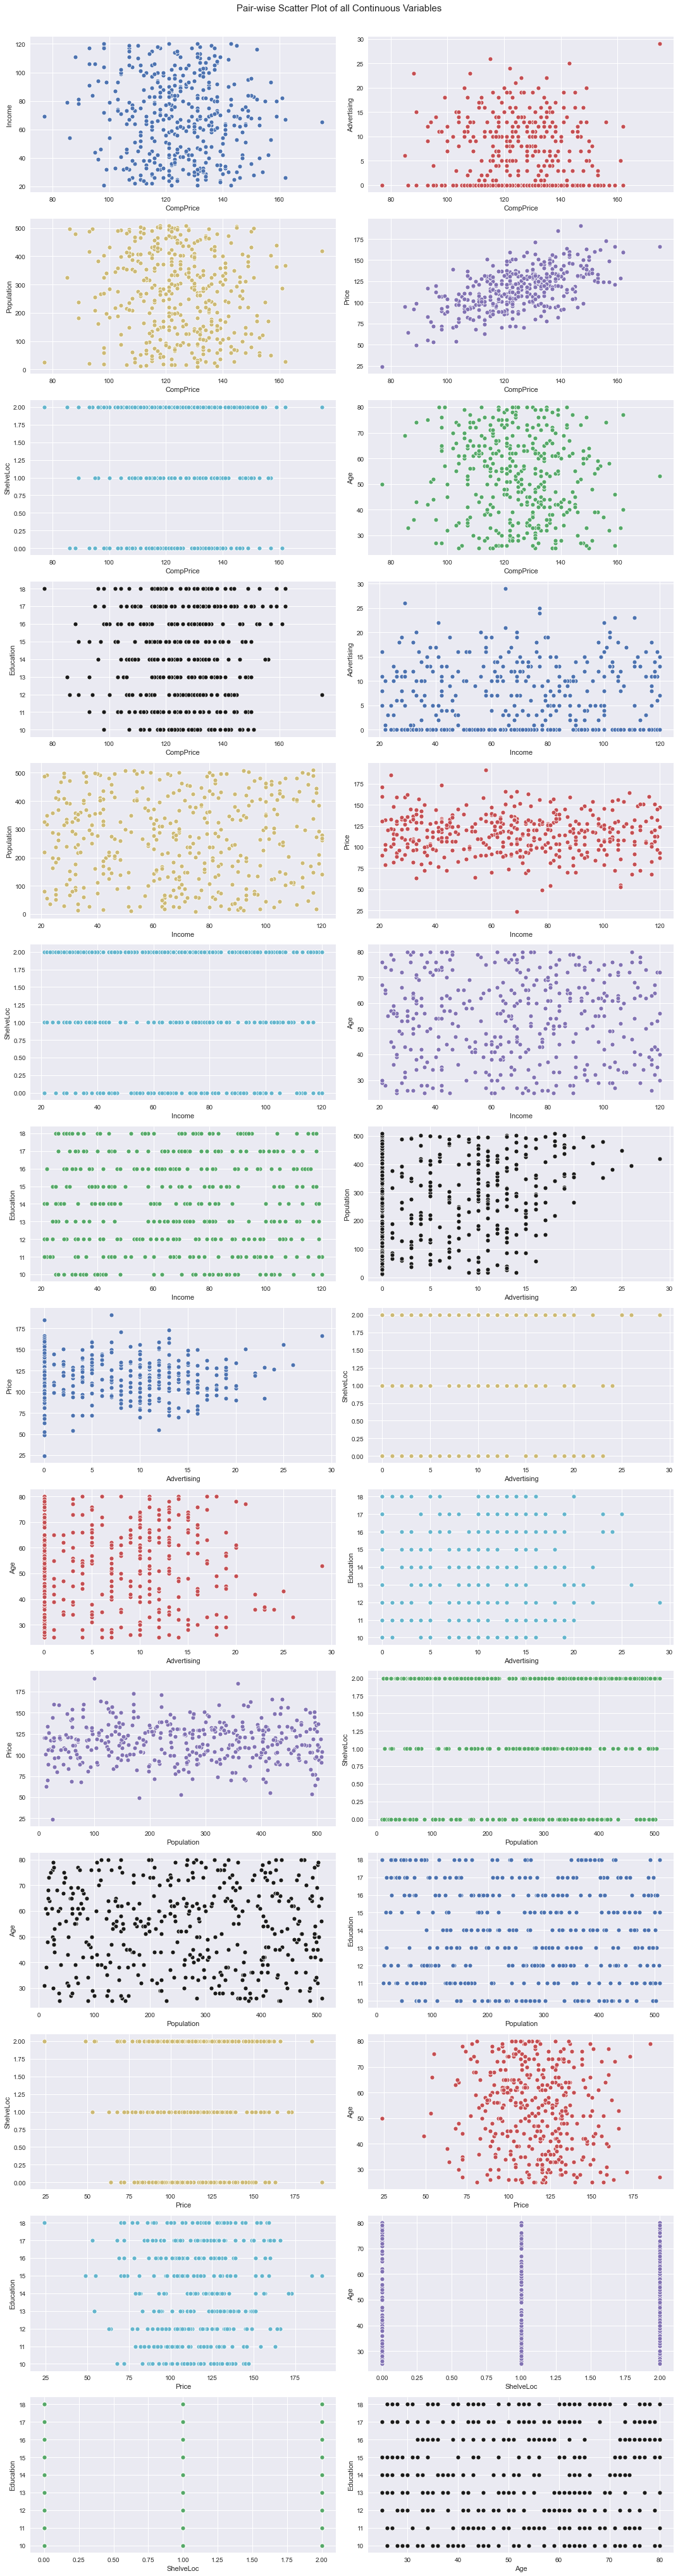

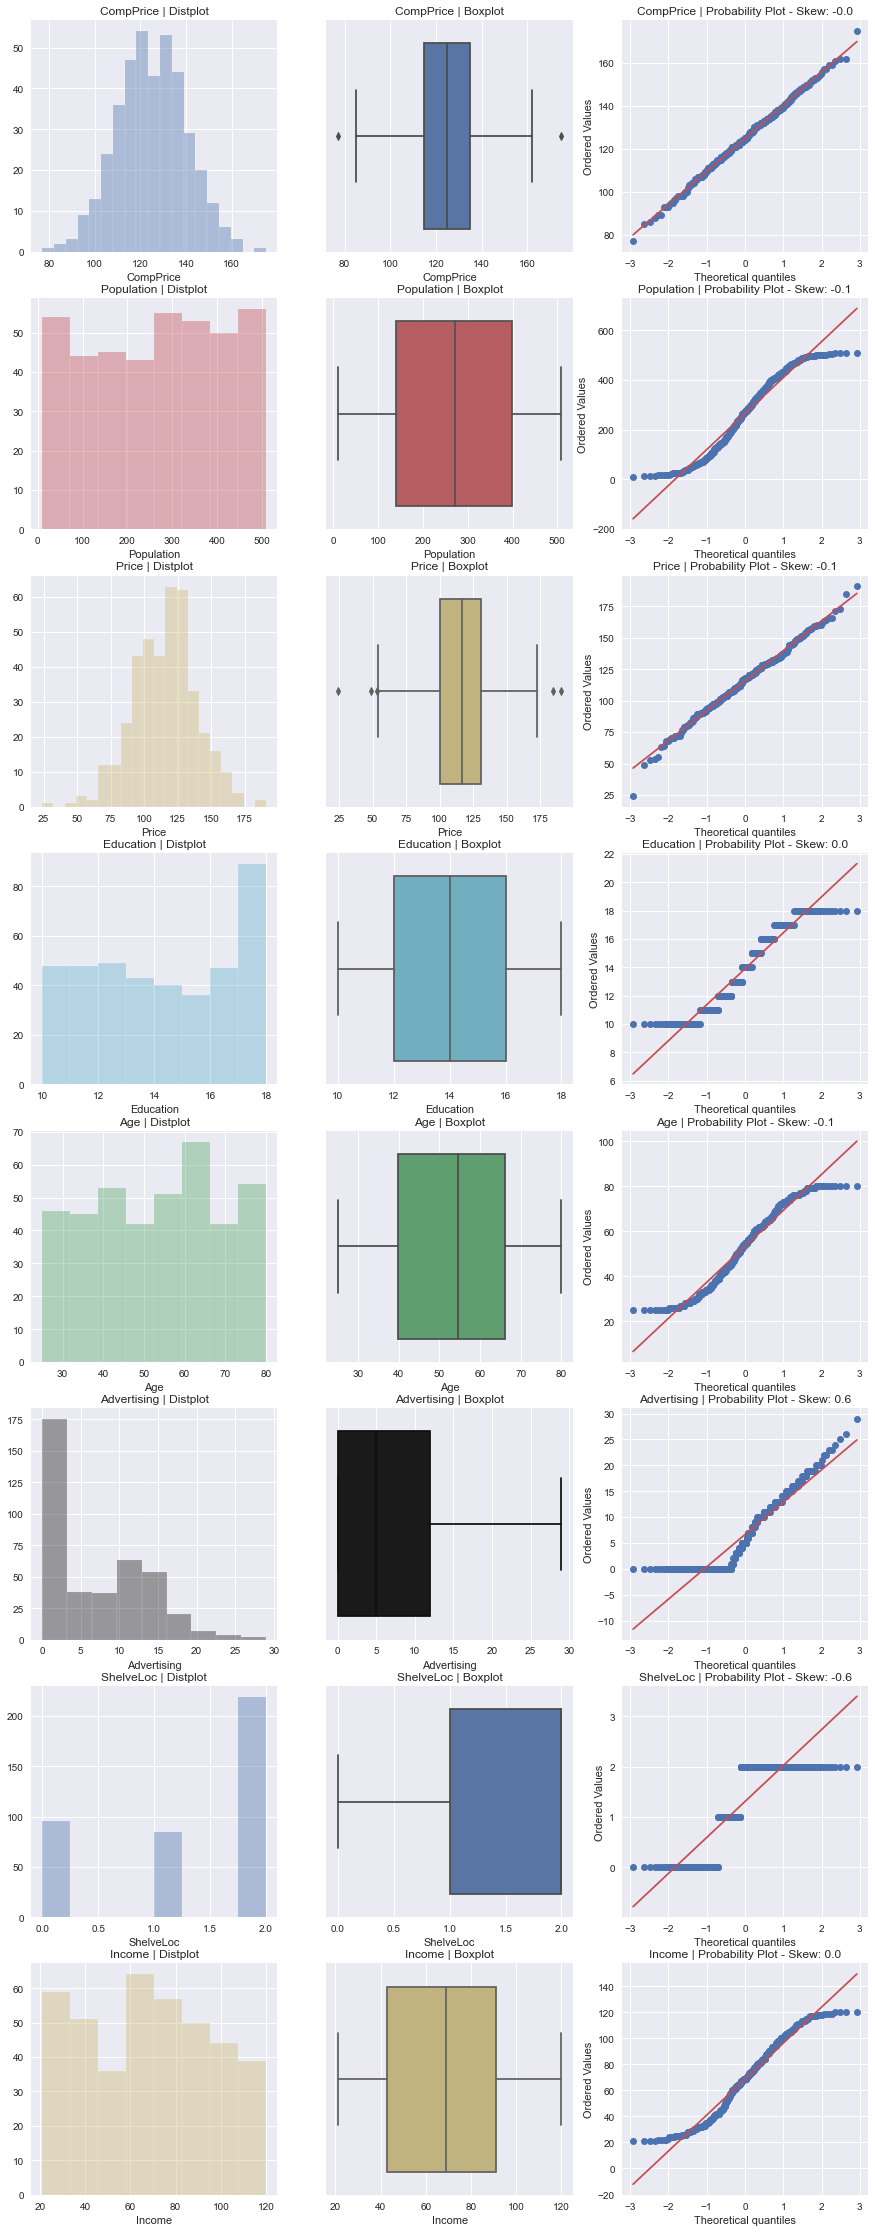

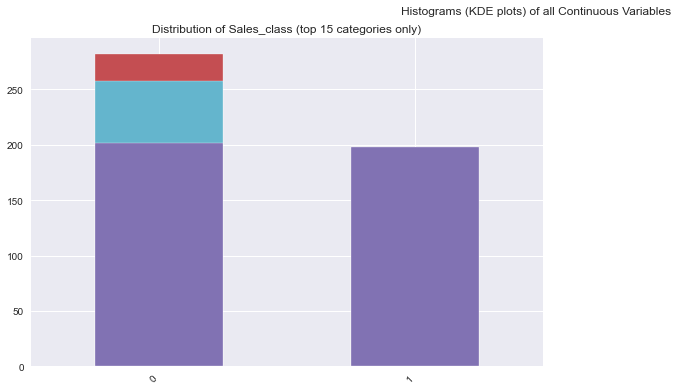

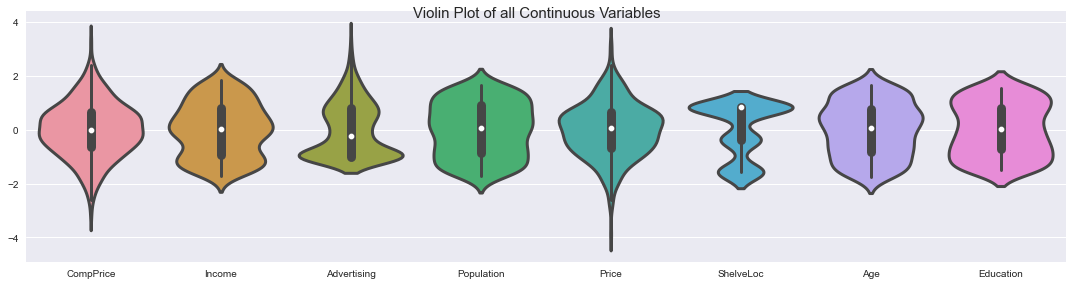

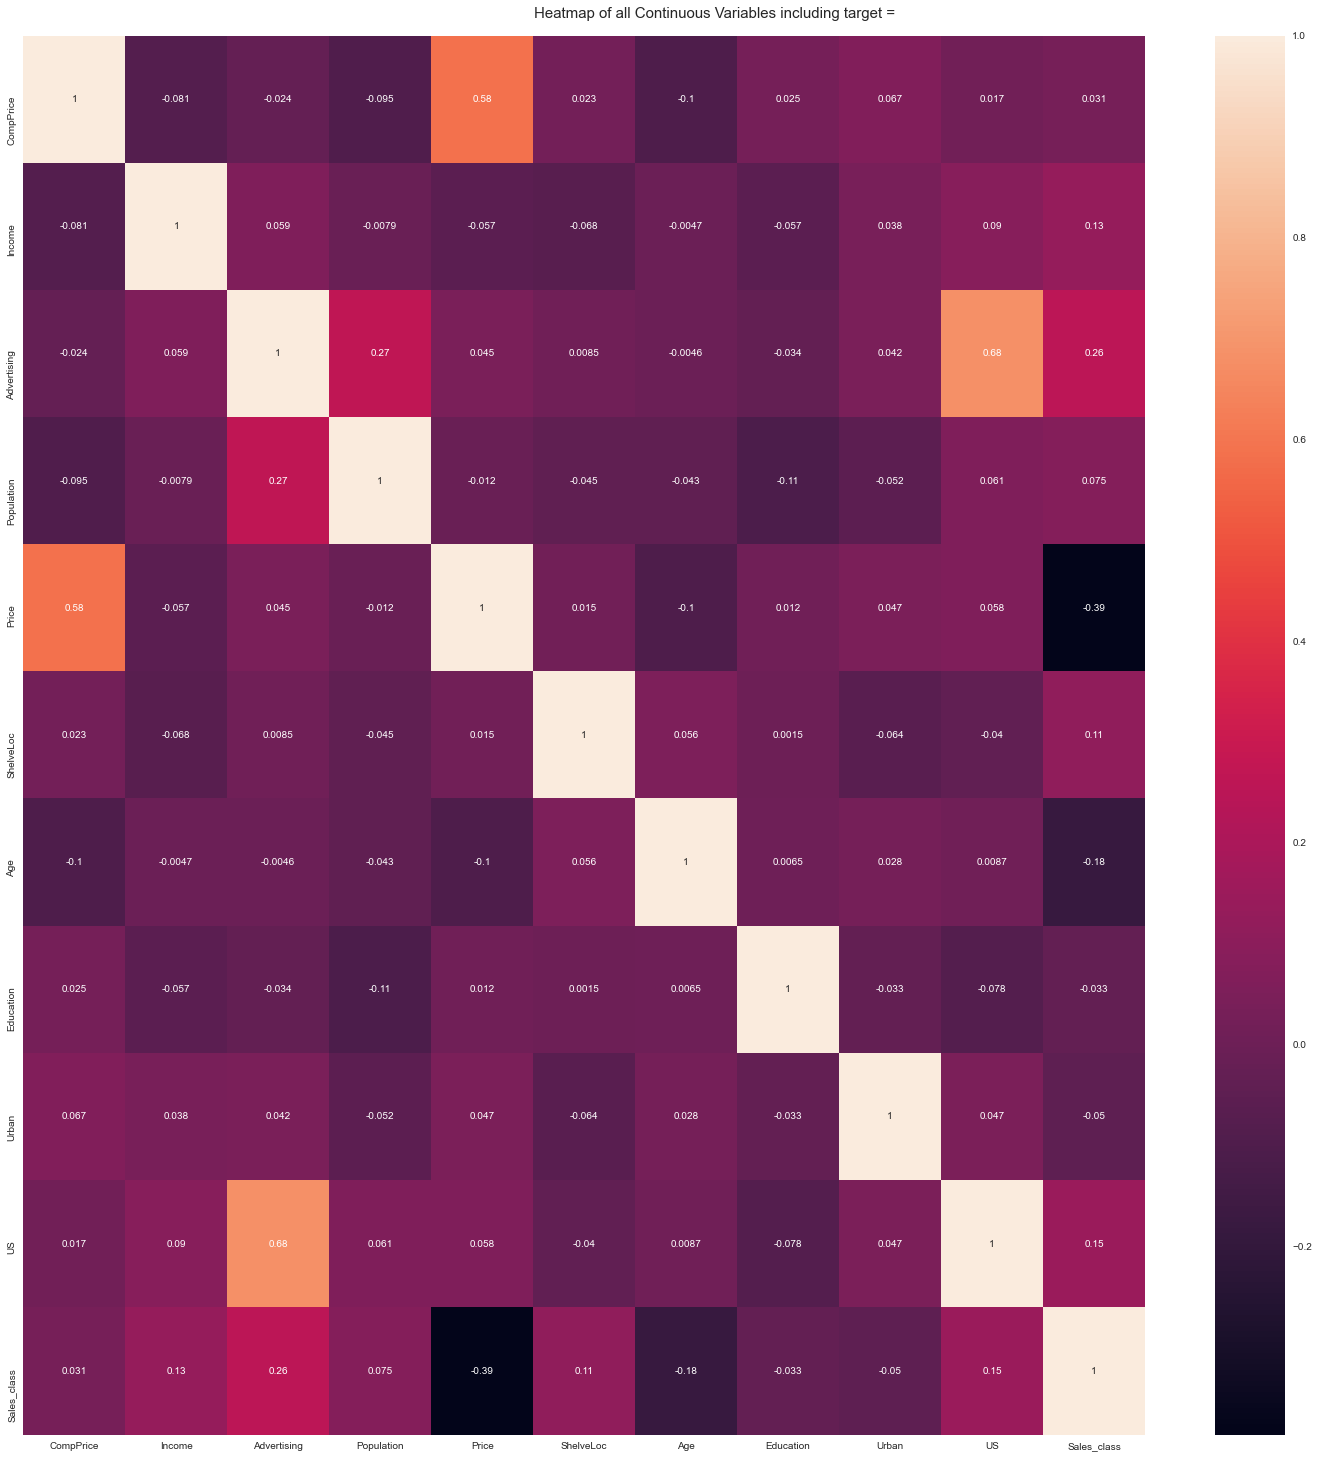

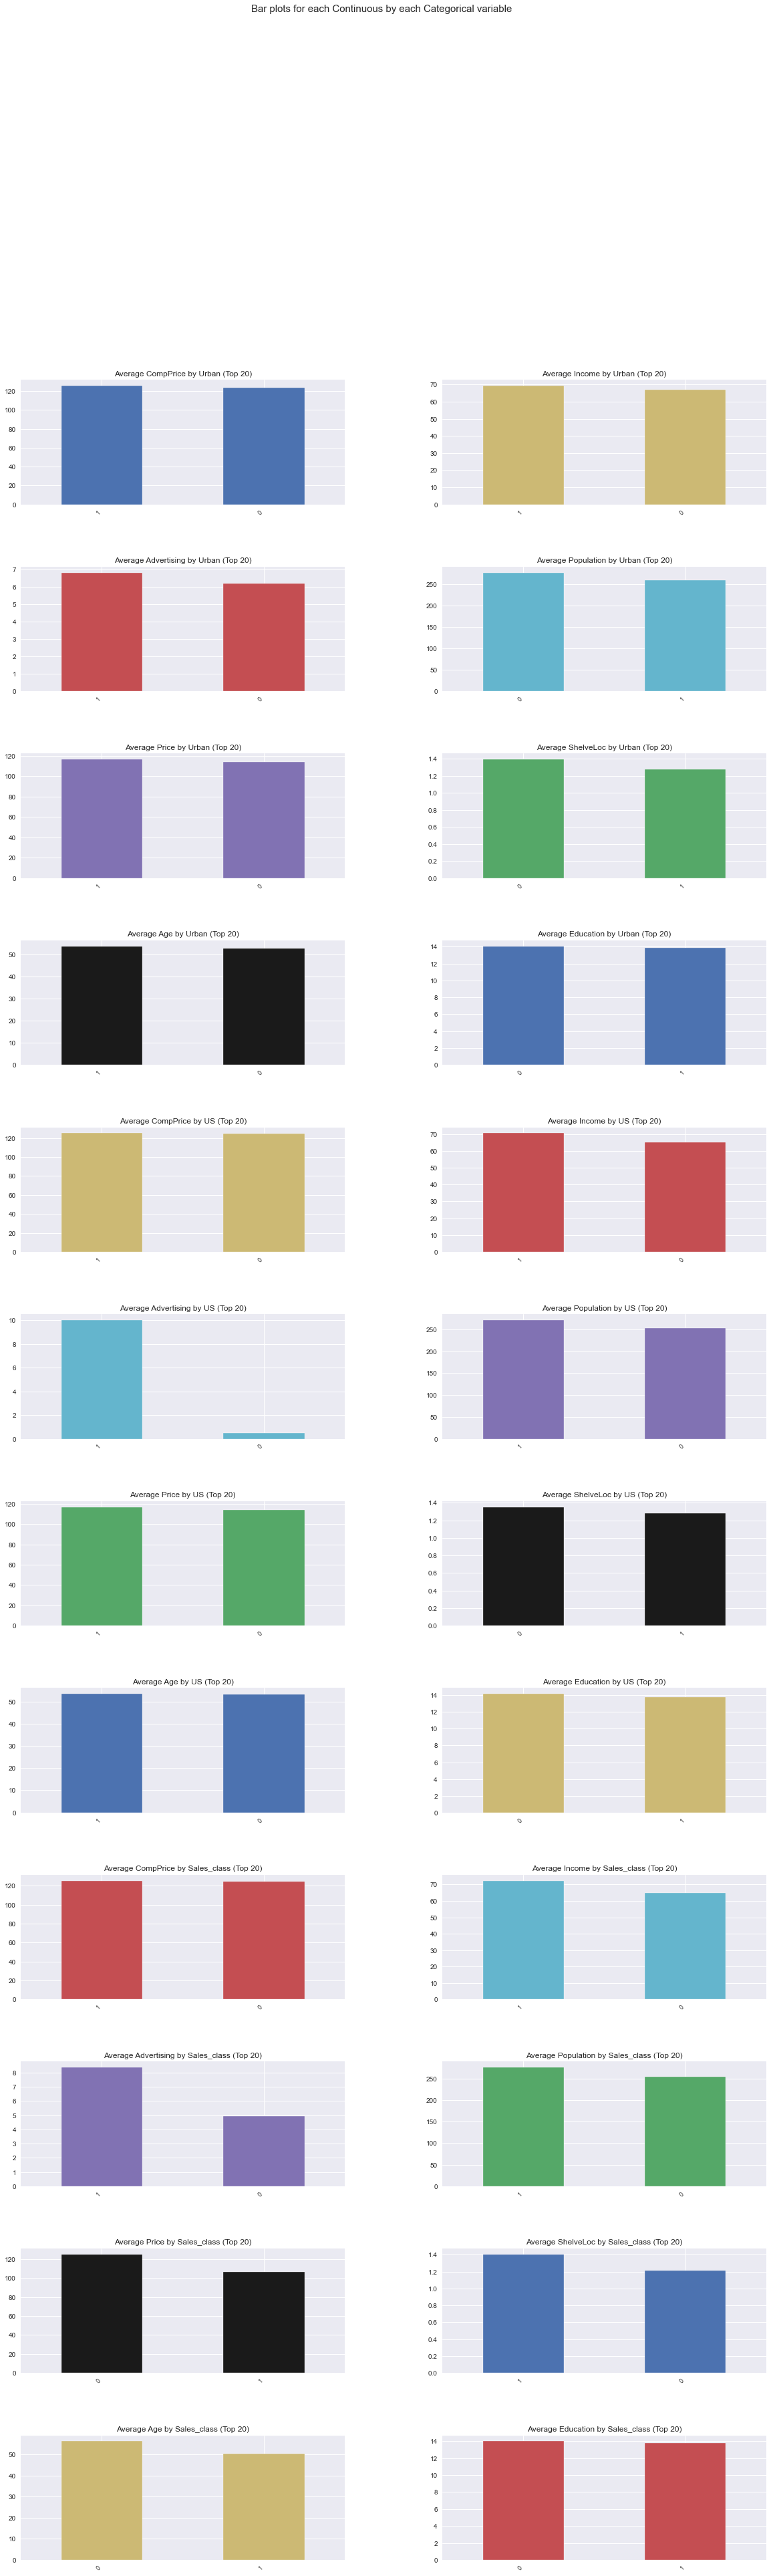

Time to run AutoViz (in seconds) = 25.342

 ###################### VISUALIZATION Completed ########################


In [190]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV=AutoViz_Class()


viz=AV.AutoViz('auto.csv')

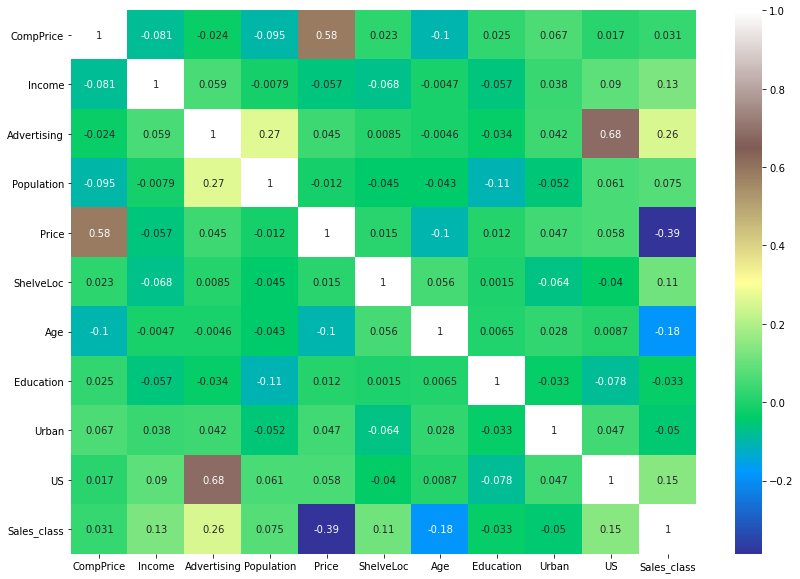

In [26]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [44]:
pdata=df.copy()
wd=df.copy()

In [16]:
x=pdata.iloc[:,0:-1]
y=pdata['Sales_class']

In [17]:
y.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

### Using logistic regression

In [18]:
import warnings


In [19]:
lr=LogisticRegression()

In [20]:
from sklearn.model_selection import GridSearchCV

### Applying grid search

In [21]:
m = [100,150,200,400,500,1000]
param_grid = ({'max_iter':m,'penalty':['l1','l2']})
lr=LogisticRegression(solver='liblinear')
grid=GridSearchCV(lr,param_grid)
grid.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [100, 150, 200, 400, 500, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
param_grid

{'max_iter': [100, 150, 200, 400, 500, 1000], 'penalty': ['l1', 'l2']}

In [25]:
grid.best_score_

0.7949999999999999

In [24]:
grid.best_params_

{'max_iter': 100, 'penalty': 'l1'}

### Splitting the data to train and test

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [37]:
X=pdata.iloc[:,0:-1]
Y=pdata['Sales_class']

In [50]:
lr2=LogisticRegression(max_iter=1000)
lr2.fit(x_train,y_train)
acc = lr2.score(x_test,y_test)*100
print(acc)

78.75


In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score=roc_auc_score(y_test,lr2.predict(x_test))
logit_roc_score

0.785355122564425

Thus, by using the Logistic Regression We got 78.5% accuracy

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=12, random_state=0)
results = cross_val_score(lr2, x,y, cv=kfold)
print("Using KFold cross validation result is : ",results.mean()*100.0)


C:\Users\Public\anacon\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Using KFold cross validation result is :  80.49613784907902


In [72]:
results.std()*100.0

4.948174280752201

### Using decision tree

In [84]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test, y_test))

1.0
0.7


### Using grid search

In [85]:
dt2_model = DecisionTreeClassifier()

In [99]:
m=list(range(2,20))
param_grid = ({'max_depth':m,'criterion':['gini','entropy'],'max_leaf_nodes':m,'min_samples_leaf':m})
dt2_model = DecisionTreeClassifier()
grid=GridSearchCV(dt2_model,param_grid)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.74
{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 19, 'min_samples_leaf': 3}


In [102]:
print(grid.best_score_)
print(grid.best_params_)

0.74
{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 19, 'min_samples_leaf': 3}


In [103]:
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [104]:
print(grid.best_score_)
print(grid.best_params_)

0.74375
{'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 19, 'min_samples_leaf': 4}


In [105]:
grid.score(x_test, y_test)

0.725

In [106]:
grid.best_score_

0.74375

In [129]:
final_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
final_model.fit(x_train, y_train)
print(final_model.score(x_train, y_train))
print(final_model.score(x_test, y_test))

0.88125
0.725


In [133]:
kfold = KFold(n_splits=12, random_state=0)
results = cross_val_score(final_model, x,y, cv=kfold)
print("Using KFold cross validation result is : ",results.mean()*100.0)


Using KFold cross validation result is :  71.2418300653595


C:\Users\Public\anacon\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Decision tree in the form of function

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [45]:
X=wd.iloc[:,0:-1]
Y=wd['Sales_class']

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)

print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    165.0  155.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[165   0]
 [  0 155]]

Test Result:
Accuracy Score: 71.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.694444   0.727273    0.7125   0.710859      0.712090
recall      0.675676   0.744186    0.7125   0.709931      0.712500
f1-score    0.684932   0.735632    0.7125   0.710282      0.712183
support    37.000000  43.000000    0.7125  80.000000     80.000000
_______________________________________________
Confusion Matr

### Applying recursive feature elimination

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE


In [140]:
RFE.predict

<function sklearn.feature_selection._rfe.RFE.predict(self, X)>

In [142]:
final_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
a = [2,3,4,5,6,7,8,9,10,11,12]
parameter = ({'n_features_to_select':a})
rfe = RFE(final_model)


In [143]:
gridRFE = GridSearchCV(rfe,parameter)
gridRFE.fit(x_train,y_train)
gridRFE.best_params_


{'n_features_to_select': 6}

In [150]:
a=RFE(final_model,6)

In [152]:
a=RFE(final_model,6)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='entropy', max_depth=8,
                                     max_features=None, max_leaf_nodes=19,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=4, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=6, step=1, verbose=0)

In [153]:
a.support_

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False])

In [154]:
a.ranking_

array([1, 1, 1, 2, 1, 1, 1, 5, 4, 3])

In [155]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [162]:
rfe2_data=df.copy()
rfe2_data.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1


In [163]:
rfe2_data.drop(['Population','Urban','US','Education'],axis=1,inplace=True)

In [164]:
rfe2_data.head(2)

,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Sales_class
0,138,73,11,120,0,42,1
1,111,48,16,83,1,65,1


In [176]:
rfe2_data.Sales_class.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

In [166]:
x1=rfe2_data.iloc[:,0:-1]
y1=rfe2_data.iloc[:,-1]

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.2,random_state=42)

In [171]:
f_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
f_model.fit(x_train, y_train)
print(f_model.score(x_train, y_train))
print(f_model.score(x_test, y_test))

0.871875
0.75


In [169]:
f_model=DecisionTreeClassifier()
f_model.fit(x_train, y_train)
print(f_model.score(x_train, y_train))
print(f_model.score(x_test, y_test))

1.0
0.7625


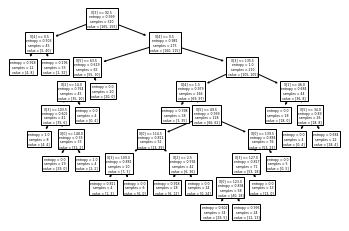

In [173]:
#PLot the decision tree
tree.plot_tree(f_model);


In [174]:
rfe2_data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc', 'Age',
       'Sales_class'],
      dtype='object')

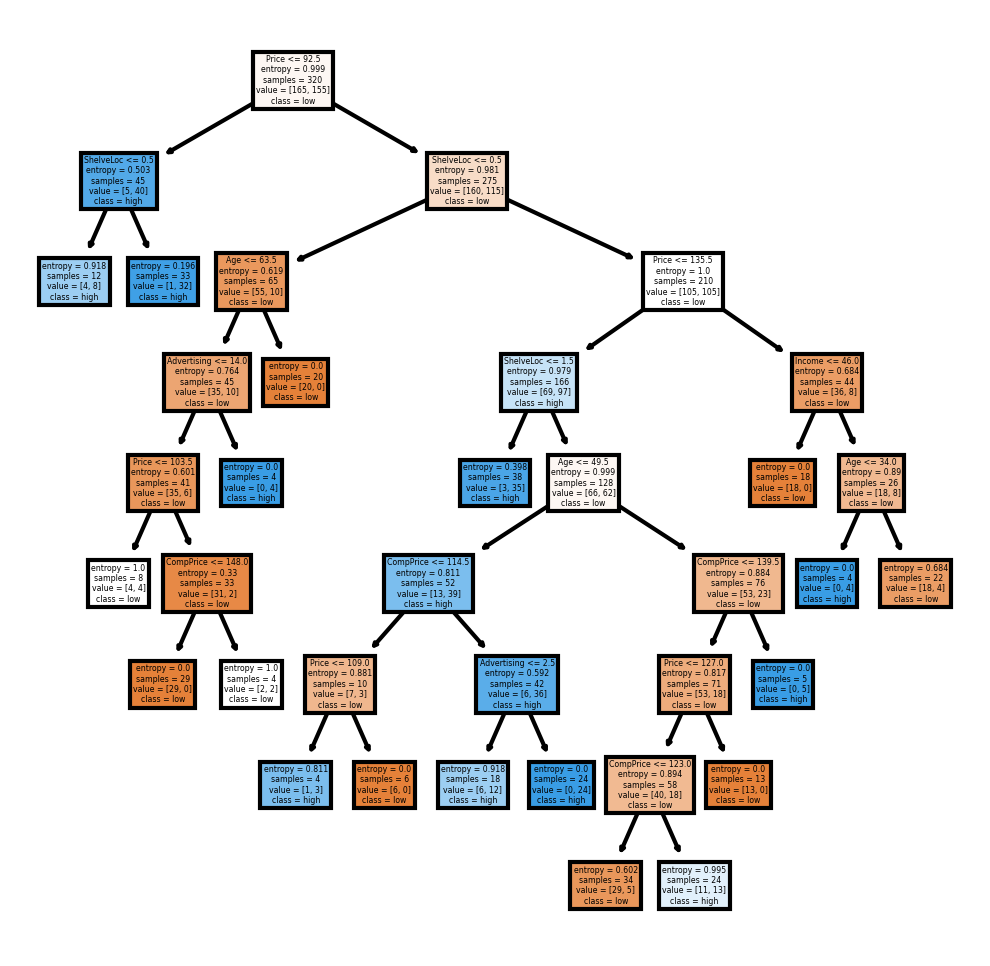

In [178]:
fn=['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc', 'Age']
cn=['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(f_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [179]:
#Predicting on test data
preds = f_model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    49
0    31
dtype: int64

In [180]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales_class,,
0,24,13
1,7,36


In [181]:
# Accuracy 
np.mean(preds==y_test)

0.75

In [188]:
df.to_csv('auto.csv')

#### Outcomes
    
=> Using the Decision Tree Classifier and applying RFE(Recursive Feature Elimination) the accuracy of 76% is obtained.

=> So, as per the dataset we get to know that 6 attributes contributes to the high sale. 